In [22]:
import matplotlib.pyplot as plt
import pandas as pd

A100x8_speed_hac = 5.25E+08
V100_speed_hac = 2.01E+07


hac_setup_expected_speed = [A100x8_speed_hac,
                        A100x8_speed_hac+V100_speed_hac,
                        A100x8_speed_hac*2]
hac_setup_expected_speed_Gb = [speed/(10*1000*1000*1000) for speed in hac_setup_expected_speed]

#I need to calculate the theorical time
#calculate the samples or the Gb processed by the run and then calculate what time
#it would take using the baseline speed of each unit used in that model
size_hac_runs = 0.5*(9.7422E+11+9.7507E+11)
hac_setup_expected_time = [size_hac_runs/speed for speed in hac_setup_expected_speed]

print('Expected speed')
print(hac_setup_expected_speed)
print()
print('Expected time')
print(hac_setup_expected_time)
print()
df_runs = pd.read_csv('runs_hac.csv')
print(df_runs)




Expected speed
[525000000.0, 545100000.0, 1050000000.0]

Expected time
[1856.4666666666667, 1788.0113740598056, 928.2333333333333]

             Setup  samples/s-avg  Gb/s-avg  total-time
0        hac_1_dgx    494000000.0    0.0494      2473.0
1  hac_1_dgx-1_gpu    537000000.0    0.0537      1995.0
2        hac_2_dgx    953000000.0    0.0953      1213.0


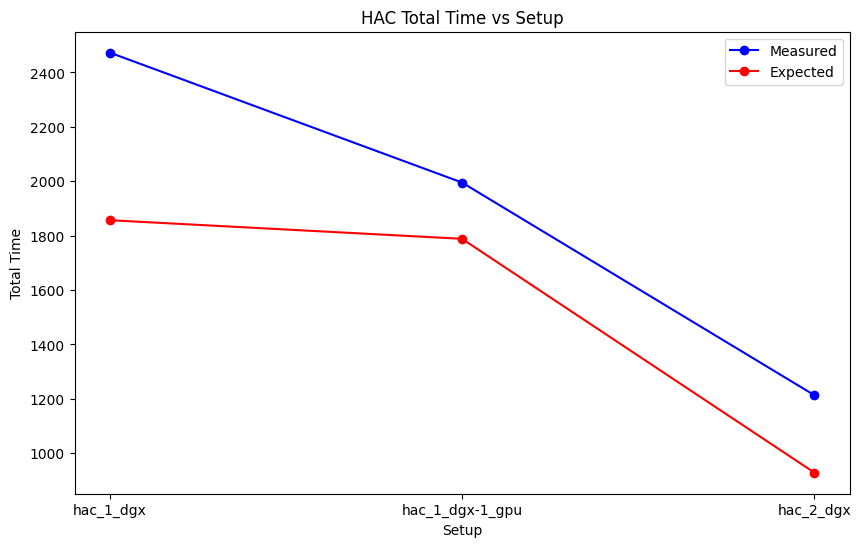

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs['Setup'], df_runs['total-time'], marker='o', color='blue', label='Measured')
plt.plot(df_runs['Setup'], hac_setup_expected_time, marker='o', color='red', label='Expected')

plt.xlabel('Setup')
plt.ylabel('Total Time')
plt.title('HAC Total Time vs Setup')

# Adding legend
plt.legend()

plt.show()


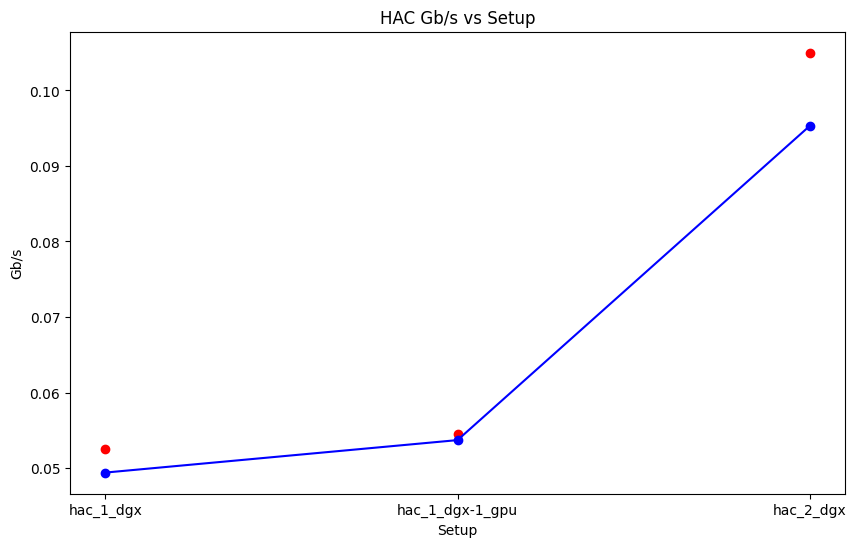

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(df_runs['Setup'], df_runs['Gb/s-avg'], marker='o', color='blue')
plt.xlabel('Setup')
plt.ylabel('Gb/s')
plt.title('HAC Gb/s vs Setup')

# Plotting dashed lines to x-axis
#for i, row in df_runs.iterrows():
    #plt.vlines(row['Setup'], 0, hac_setup_expected_speed[i], linestyles='dashed', colors='gray')

plt.scatter(df_runs['Setup'],hac_setup_expected_speed_Gb, marker = 'o', color='red')


plt.show()